# Regressão Linear Simples

Regressão é uma técnica usada para tentar estabelecer uma relação entre variáveis, em geral, com objetivo de entender ou prever como uma dada variável quantitativa contínua varia em relação a outras variáveis. A variável na qual se tem interesse é a variável alvo e, em geral, vai ser denotada por $y$ enquanto que a(s) demais variável(is) usadas serão as chamadas de variáveis regressoras e denotadas por $X_i$, em que $i$ varia de 1 até o número de variáveis.

Por exemplo, você observa que quanto maior a temperatura, mais as pessoas consomem sorvete e, então, tenta prever a quantidade média de sorvetes vendida por um grupo de lojas usando como base apenas a temperatura.

Neste caso o $y$ é a quantidade média de sorvetes vendidos, pois é a variável na qual está interessado em entender ou determinar o comportamento, enquanto que a temperatura será $X$, pois é a variável que você está usando para tentar determinar $y$. Você poderia obter vários modelos diferentes como, por exemplo, $y = cos(X)$ ou $y = 3x$. Eventualmente, muitos modelos podem se mostrar interessante, mas nós vamos focar em modelos lineares, isto é, modelos da forma $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n$, em que $\beta_0, \beta_1, \ldots, \beta_n$ são todas constantes que devem ser estimadas para se obter o modelo.

Quando só tivermos uma variável $X$ diremos que a regressão linear é simples, quando tivermos mais de uma variável $X$ diremos que a regressão linear é múltipla.

Em Python, podemos construir modelos lineares usando os pacotes `statsmodels` ou `sklearn`. Vamos usar o `statsmodels` nesse momento pois estamos interessados em entender melhor alguns detalhes estatísticos dos modelos de regressão linear.

Então vamos para a prática! Vamos importar os dados de cidades e criar alguns modelos de regressão linear!

In [3]:
import pandas as pd

In [4]:
# Carregando os dados
df = pd.read_csv('../mod2.spr1_Analise_Multivariada_I/2.3_Regressao_Linear_Exercicio_Dados.csv')
df.head(2)

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0


Vamos separar apenas algumas variáveis de interesse. Será que podemos estimar o `% de pobres` com base na `Porcentagem de Ativos` para o estado de Minas Gerais? Será que podemos obter alguma interpretação de tal modelo?

A variável `Porcentagem de Ativos` é a porcentagem da população em idade economicamente ativa (entre 25 e 64 anos).

In [5]:
# Filtrando apenas os dados referentes a Minas Gerais
df = df[df['estado'] == 'Minas Gerais']
df.head(2)

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
1564,Abadia dos Dourados,Minas Gerais,6704,7.61,34.99,55.83,9.17,63.80,56.24,79.31,...,75.00,12.19,43.57,19.85,720.64,1922182.04,10.73,4.08,13.72,0.00
1565,Abaeté,Minas Gerais,22690,12.49,37.16,52.61,10.23,86.94,79.99,73.89,...,63.84,18.30,13.74,49.14,869.82,2078524.85,15.11,5.21,29.66,2.64


In [6]:
# Selecionando apenas as colunas de interesse
df = df[['Porcentagem de Ativos', '% de pobres']]
df.head(2)

,Porcentagem de Ativos,% de pobres
1564,55.83,7.94
1565,52.61,6.69


Vamos aplicar uma transformação logarítmica na variável `Porcentagem de Ativos`. Tais transformações são necessárias ou úteis em alguns casos.

In [7]:
import numpy as np

In [8]:
# Aplicando a transformação logarítmica
df['Porcentagem de Ativos'] = np.log(df['Porcentagem de Ativos'])
df.head(2)

,Porcentagem de Ativos,% de pobres
1564,4.022311,7.94
1565,3.962906,6.69


O modelo de regressão linear de duas variáveis será melhor à medida que as variáveis $X$ e $y$ apresentam alta correlação linear. Mas lembre-se de que para calcular a correlação todas as variáveis devem estar em uma mesma escala, se tivermos mais de uma variável. Também será uma boa prática criar modelos com variáveis na mesma escala.

Se for uma regressão linear simples, a mudança de escala não é necessária.

In [9]:
# Gerando a matriz de correlação
df.corr()

,Porcentagem de Ativos,% de pobres
Porcentagem de Ativos,1.000000,-0.832919
% de pobres,-0.832919,1.000000


Podemos ver que a correlação linear entre as variáveis é de -0.83 aproximadamente, que é uma correlação forte. Lembre que esse valor varia de -1 a +1, sendo que quanto mais próximo desses valores, maior é a correlação.

Para criar um modelo de regressão linear com o pacote `statsmodels` vamos usar a função `statsmodels.api.OLS()` e ajustar o modelo com método `.fit()`. No `statsmodels` devemos obrigatoriamente adicionar o termo constante ao modelo, em outros pacotes o termo constante pode vir naturalmente inserido no modelo. Podemos realizar essa operação com a função `add_constant(X)` em que `X` representa a(s) variável(is) `X`.

In [10]:
# Importando dependência
import statsmodels.api as sm

# Definindo variáveis
X = df['Porcentagem de Ativos']
y = df['% de pobres']

# Adicionando a constante
X = sm.add_constant(X)
print(X)

      const  Porcentagem de Ativos
1564    1.0               4.022311
1565    1.0               3.962906
1566    1.0               3.918204
1567    1.0               3.878466
1568    1.0               3.826029
...     ...                    ...
2412    1.0               3.840312
2413    1.0               3.797061
2414    1.0               3.960432
2415    1.0               3.901366
2416    1.0               3.968781

[853 rows x 2 columns]


In [11]:
# Criando o modelo | Nota: OLS = Ordinary Least Squares (Método dos Mínimos Quadrados)
modelo1 = sm.OLS(y, X).fit()

# Visualizando o modelo
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:            % de pobres   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1928.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          6.90e-221
Time:                        12:26:11   Log-Likelihood:                -2804.6
No. Observations:                 853   AIC:                             5613.
Df Residuals:                     851   BIC:                             5623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   508.57

O quadro acima contém várias informações sobre o modelo. Uma parte importante fica na coluna da direita, em que encontramos `R-squared` essa é uma medida de quão bom está o modelo. Falaremos sobre ela mais a frente.

Por hora basta saber que 'R-squared' atinge no máximo 1 e que quanto mais próximo de 1, melhor está o modelo. No nosso caso o $R^2$ é de 0.69 indicando que o modelo não está ótimo mas está relativamente bom.

Na parte inferior também podemos ver a estimativa para a constante e para o coeficiente que multiplica $X$. Ou seja, obtemos daí os valores que formam o modelo em si.

In [12]:
# Visualizando apenas os parâmetros
print(modelo1.params)

const                    508.571124
Porcentagem de Ativos   -125.680176
dtype: float64


Para se obter somente os valores estimados pode-se usar `modelo.params`

Portanto, nosso modelo ficou da forma $y = 508.57 - 125.68 X$ em que $y$ é `% de pobres` e $X$ é `Porcentagem de Ativos`. Isso significa que a cada uma unidade que se aumenta no logaritmo da porcentagem de ativos, diminui-se 125.68 unidades da variável porcentagem de pobres.

O resultado pode parecer estranho, mas lembre-se de que foi aplicado o logaritmo na variável `Porcentagem de Ativos`, dessa forma fica um pouco mais difícil interpretar o modelo. Claramente a porcentagem de pobres não pode assumir quaisquer valores.

Se o modelo estiver bom, podemos usá-lo para fazer estimativas. Para fazer isso basta pegar o modelo treinado e usar o método `.predict()` passando o valor que deseja considerar para `X`, lembrando de inserir a constante.

In [13]:
# Realizando uma previsão: constante = 1, X = 3.5
modelo1.predict([1, 3.5])

array([68.69050856])

In [14]:
# Desfazendo a transformação logarítmica (aplicando a operação inversa: exponenciação)
np.exp(3.5)

33.11545195869231

O resultado acima pode ser interpretado como:
Quando o valor de X ( Porcentagem de Ativos ) é igual a 33.11%, o valor de y ( % de pobres ) é igual a 68.69%.

Lembrando que 3.5 é o valor transformado pelo logaritmo. Como exp(3.5) é aproximadamente 33.11, obtemos uma previsão de cerca de 68.69% de pobres nessa região que possui porcentagem de ativos de 33.11%.

Também devemos tomar muito cuidado com os valores que podemos considerar para a variável `X` se formos fazer alguma previsão.

In [15]:
# Visualizando valores máximos e mínimos de X
# Idealmente, as previsões feitas a partir do modelo devem se restringir à faixa de valores em que o modelo foi treinado
maximo = df['Porcentagem de Ativos'].max()
minimo = df['Porcentagem de Ativos'].min()
print(f'Valor mínimo: {minimo} | Valor máximo: {maximo}')

Valor mínimo: 3.580737295494233 | Valor máximo: 4.053869729656382


Observando os valores acima, podemos ver que só seria adequado tentar fazer previsões utilizando uma porcentagem de ativos entre 3.58 e 4.05. Isto acontece porque o modelo foi estimado com valores nessa faixa e tentar fazer previsões fora dessa faixa pode causar um erro muito grande. Quanto mais longe desses extremos, menos confiável é a previsão do modelo.

Não vamos entrar em detalhes estatísticos (são muitaaaaaas fórmulas de estimação de erro e variância) mas alguns autores defendem que em hipótese alguma pode-se supor um valor fora da faixa; outros argumentam que poderia utilizar apenas se fossem valores próximo e com muita cautela.

## **Atenção!!!** Nosso modelo parece bom, mas nada de sair usando ele para tirar conclusões! Primeiramente é preciso verificar se o modelo satisfaz os pressupostos. Se não satisfizer, então não poderemos utilizá-lo na forma como está.

Muitas pessoas não fazem essa verificação, isto é um erro grave. Não faça isso! Deixe os estatísticos felizes verificando todos os detalhes!

## Pressupostos da Regressão Linear

A regressão linear não pode ser usada de maneira indiscriminada. A validade das conclusões que se pode extrair de um modelo estão apoiadas nas suposições que foram usadas para sua construção, isto é, seus pressupostos.

Um modelo de regressão linear é construído assumindo:

* Linearidade: Relação linear entre X e y;

* Homocedasticidade: A variância dos resíduos é constante;

* Independência: Os resíduos devem ser independentes;

* Normalidade: Os resíduos são normalmente distribuídos.

* As variáveis `X_i` não devem ser fortemente correlacionadas uma com as outras;


Resíduos (ou erros) são as diferenças entre o valor real da variável `y` para um dado `X` e o valor `\hat{y}` estimado pelo modelo para o mesmo `X`.

In [16]:
# Calculando os resíduos
y_pred1 = modelo1.predict(X)
res1 = y - y_pred1
print(res1)

1564    4.893675
1565   -3.822374
1566    7.199427
1567    5.405193
1568    2.984910
          ...   
2412   -6.640017
2413    0.614169
2414   -4.353316
2415   -2.586706
2416    5.316013
Length: 853, dtype: float64


Vamos verificar se nosso modelo satisfaz os pressupostos da regressão linear.

### Linearidade

Para observar a linearidade, no caso da regressão simples, podemos utilizar um gráfico de dispersão.

<Axes: xlabel='Porcentagem de Ativos', ylabel='% de pobres'>

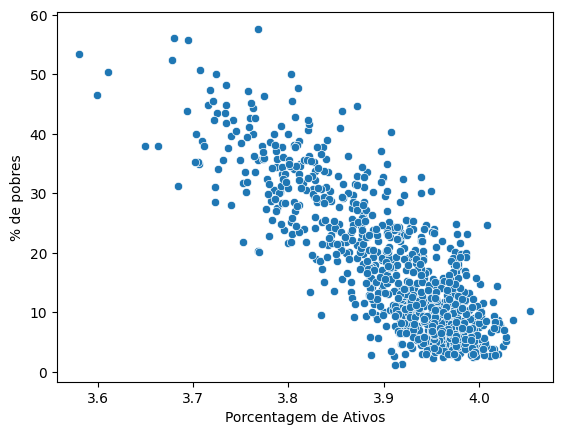

In [17]:
# Importando dependência externa
import seaborn as sns

# Gerando gráfico de dispersão
sns.scatterplot(x='Porcentagem de Ativos', y='% de pobres', data=df)

Observando o gráfico podemos ver que quanto maior a porcentagem de ativos, menor é a porcentagem de pobres. O gráfico parece indicar uma reta, embora haja muita dispersão. Isto é indicação de linearidade.

### Homocedasticidade

Vamos checar a homocedasticidade com um teste de hipótese: Goldfeld Quandt. Este teste pode ser realizado importando-se a função `statsmodels.stats.api.het_goldfeldquandt()`.

Neste teste, a hipótese nula é de que há homocedasticidade.

In [21]:
from statsmodels.stats.api import het_goldfeldquandt

stat, p_value, _ = het_goldfeldquandt(res1, X)
print(f'p_valor é igual a: {p_value}')

p_valor é igual a: 0.3849820504660344


Como o p valor é maior que 0.05, NÃO . Isto é, podemos supor que há homocedasticidade nos resíduos.

### Normalidade dos Resíduos

Vamos checar a normalidadde dos resíduos usando o teste de hipóteses de Shapiro-Wilk. Neste caso, a hipótese nula é que a amostra segue distribuição normal. Podemos realizar este teste importando a função `scipy.stats.shapiro()`.

In [22]:
from scipy.stats import shapiro

stat, p_value = shapiro(res1)
print(f'p_valor é igual a: {p_value}')

p_valor é igual a: 1.2978301811017445e-07


Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Isto é, temos evidência de que os resíduos não seguem uma distribuição normal.

Isto indica que nosso modelo não satisfaz todos os pressupostos que deveria satisfazer. 

Muito importante! Não deveríamos usar este modelo para nenhum tipo de análise ou previsão.

### Autocorrelação dos Resíduos

Para checar se há autocorrelação entre os resíduos vamos usar o teste de hipótese de Durbin Watson. Ele pode ser importado do `statsmodels` com a sintaxe `statsmodels.stats.stattolls.durbin_waton()`.

In [24]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res1)

1.9933786933048794

Para decidirmor se há ou não autocorrelação dos resíduos, devemos observar o valor do teste. Valores entre 1.5 e 2.5 indicam que não há autocorrelação, valores fora dessa faixa indicam que há autocorrelação.

### Multicolinearidade

Não é preciso checar a multicolinearidade, pois só temos UMA variável preditora. Essa checagem é importante quando temos mais de uma variável preditora.

# Regressão Linear Múltipla

A regressão linear múltipla é uma extensão da regressão linear simples, pois a ideia é obter um modelo da forma $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n$.

Vamos importar os dados novamente e criar um modelo de regressão linear múltipla. Vamos continuar analisando os dados para o estado de Minas Gerais, mas agora vamos tentar entender a variável `% de pobres` como combinação linear de `Porcentagem de Ativos` e `IDH`.

In [26]:
# Importando e tratando os dados novamente
df = pd.read_csv('../mod2.spr1_Analise_Multivariada_I/2.3_Regressao_Linear_Exercicio_Dados.csv')

# Filtrando apenas os dados referentes a Minas Gerais
df = df[df['estado'] == 'Minas Gerais']

# Selecionando apenas as colunas de interesse
df = df[['Porcentagem de Ativos', 'IDH', '% de pobres']]

# Visualizando
df.head(2)

,Porcentagem de Ativos,IDH,% de pobres
1564,55.83,0.84,7.94
1565,52.61,0.85,6.69


In [37]:
# Definindo X e y
X = df[['Porcentagem de Ativos', 'IDH']]
y = df['% de pobres']

Vamos importar a biblioteca `numpy` e aplicar o logaritmo a cada observação do conjunto X. Pode ser necessário alguma manipulação dos dados antes de criar um modelo.

In [38]:
# Aplicando transformação logarítmica aos dados contidos em `X`
X = np.log(X)
X.head(2)

,Porcentagem de Ativos,IDH
1564,4.022311,-0.174353
1565,3.962906,-0.162519


Padronizando os dados para uma mesma escala.

In [42]:
# Importando dependência externa
from sklearn.preprocessing import StandardScaler

# Instanciando a classe
scaler = StandardScaler()

# Criando cópia dos valores
X_scaled = X.copy()

# Padronizando os dados
X_scaled[['Porcentagem de Ativos', 'IDH']] = scaler.fit_transform(X_scaled)

#Visualizando novo dataframe
X_scaled.head(2)

,Porcentagem de Ativos,IDH
1564,1.494950,0.535906
1565,0.729624,0.859209


A sintaxe para criar um modelo de regressão linear múltipla é a mesma que usamos para a regressão linear simples, a única diferença é que a variável X é um DataFrame com mais de uma coluna.

In [44]:
# Criando o modelo

X2 = sm.add_constant(X_scaled)
modelo2 = sm.OLS(y, X2).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:            % de pobres   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1286.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          9.52e-258
Time:                        15:33:59   Log-Likelihood:                -2715.4
No. Observations:                 853   AIC:                             5437.
Df Residuals:                     850   BIC:                             5451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.63

Observando o R quadrado ajustado para o modelo 1 (que foi 0.69) e para a regressão linear que usa duas variáveis preditoras (0,75), podemos ver que o R quadrado ajustado foi maior para o segundo modelo. Isto é, usar as duas variáveis melhorou o modelo.

Adicionar variáveis vai sempre melhorar o modelo? A resposta é não! Veremos isso em detalhes mais a frente.

In [45]:
# Visualizando os parâmetros do modelo2
print(modelo2.params)

const                    17.630141
Porcentagem de Ativos    -7.366506
IDH                      -3.692514
dtype: float64


O modelo estimado foi $y = 17.63 - 7.37$ `Porcentagem de Ativos` $- 3.69$ `IDH`

Agora temos que calcular os resíduos e analisar se o modelo satisfaz os pressupostos.

In [46]:
# Calculando os resíduos
y_pred2 = modelo2.predict(X2)
res2 = y - y_pred2
print(res2[0:2])

1564    3.301259
1565   -2.392716
dtype: float64


### Verificando Homocedasticidade dos Resíduos (Goldfeld-Quandt)

In [54]:
from statsmodels.stats.api import het_goldfeldquandt

significance_level = 0.05

stat, p_value, _ = het_goldfeldquandt(res2, X2)

if p_value < significance_level:
    print(f'p_valor ({round(p_value,2)}) é menor que o nível de significância, portanto pode-se rejeitar a hipótese nula')
else:
    print(f'p_valor ({round(p_value,2)}) é maior que o nível de significância, portanto não se pode rejeitar a hipótese nula. Esse resultado suporta a aplicação da regressão linear múltipla')

p_valor (0.73) é maior que o nível de significância, portanto não se pode rejeitar a hipótese nula. Esse resultado suporta a aplicação da regressão linear múltipla


Como o p valor é maior que 0.05, não podemos rejeitar a hipótese nula. Isto é, podemos supor que há homocedasticidade nos resíduos.

### Verificando Normalidade dos Resíduos (Shapiro-Wilk)
- H0: Os resíduos seguem uma distribuição normal
- H1: Os resíduos não seguem uma distribuição normal

In [58]:
# Aplicando o teste de Shapiro-Wilk
stat, p_value = shapiro(res2)
if p_value < significance_level:
    print(f'p_valor ({round(p_value,2)}) é menor que o nível de significância, portanto pode-se rejeitar a hipótese nula')
else:
    print(f'p_valor ({round(p_value,2)}) é maior que o nível de significância, portanto não se pode rejeitar a hipótese nula. Esse resultado suporta a aplicação da regressão linear múltipla')

p_valor (0.1) é maior que o nível de significância, portanto não se pode rejeitar a hipótese nula. Esse resultado suporta a aplicação da regressão linear múltipla


Como o p valor é maior que 0.05, não podemos rejeitar a hipótese nula. Isto é, podemos considerar que os resíduos são normalmente distribuídos.

# Autocorrelação dos Resíduos (Durbin-Watson)

In [60]:
# Aplicando o teste de Durbin-Watson
durbin_watson(res2)

2.0361090761268095

Como o valor da estatística está próximo de 2, conclui-se que NÃO HÁ autocorrelação das observações.

## Multicolinearidade

Vamos usar fatores de inflação de variância (Variance Inflation Factors - VIF) para verificar se há multicolinearidade. Cada variável vai ter seu valor VIF calculado e consideraremos:

* Se VIF > 10, há indícios de que pode haver multicolinearidade

* Se VIF > 100, certamente há multicolinearidade entre as variáveis


Se alguma variável apresentar alto valor de VIF, considere removê-la do modelo.

Para calcular o VIF vamos usar a função `variance_inflation_factor` usando a sintaxe `statsmodels.stats.outliers_influence.variance_inflation_factor`

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Criando uma lista com os valores de VIF
VIF = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

for indice, vif in enumerate(VIF):
    print(f'{X2.columns[indice]}: {round(vif,2)}')

const: 1.0
Porcentagem de Ativos: 1.72
IDH: 1.72


Como todos os valores são menores que 10, não há indícios de multicolinearidade.

# Avaliando Modelos

Agora temos dois modelos que tentam estimar a mesma variável $y$. Qual deles é melhor? Para responder a esta pergunta temos que falar sobre as métricas de avaliação de modelos.

## Métricas

Já vimos como criar modelos de regressão linear (simples e múltipla). Uma maneira de avaliar o modelo é pelo R quadrado, mas existem outras formas (outras métricas) para medir a performance de um modelo e diferentes problemas podem demandar diferentes métricas de interesse. Por isso, hoje vamos conhecer algumas formas de medir a qualidade dos modelos de regressão linear.

### R² e R² Ajustado

R² é uma medida que serve para testar quão bem um modelo está se ajustado aos dados. Quanto mais próximo de 1, melhor o modelo. Quanto mais variáveis adicionamos ao modelo, maior é o valor do R² e isto é um problema!

Algumas variáveis são importantes para o modelo e outras nem tanto, e o R² não nos permite avaliar isso diretamente. Além disso, ter muitas variáveis no modelo pode levar a um problema chamado overfitting (você vai estudar sobre ele logo no módulo de Machine Learning).

O resumo da história toda é que nós queremos o melhor modelo possível que use a menor quantidade possível de variáveis! É aí que surge o R² Ajustado, que é uma modificação no R² feita para levar em conta o número de variáveis do modelo. Se usarmos muitas variáveis o R² vai ser alto mas o R² Ajustado vai ser baixo.

O R² Ajustado é calculado por 

$$R² Ajustado = 1 - (1 - R²) \frac{n-1}{n-p-1}$$

em que $n$ é o número de observações na amostra e $p$ é o número de variáveis independentes do modelo

Podemos obter os valor do $R^2$ com a sintaxe `modelo.rsquared` e o $R^2$ ajustado com `modelo.rsquared_adj` para modelos do `statsmodels`. 

In [75]:
# Comparando os valores de R quadrado
print(modelo1.rsquared)
print(modelo2.rsquared)

0.6937541367795073
0.7515471678126603


In [76]:
# Comparando os valores de R quadrado ajustado
print(modelo1.rsquared_adj)
print(modelo2.rsquared_adj)

0.6933942709002823
0.750962572913396


Com base nesses resultados podemos considerar que o modelo 2 é melhor.

Mas qual é a interpretação dessa métrica?

Podemos dizer que 75 por cento do comportamento de $y$ é explicado por $X$.

### RMSE (Root Mean Squared Error)

Antes de falarmos sobre a Raiz do Erro Quadrático Médio (Root Mean Squared Error, em inglês) vamos falar brevemente sobre MSE (Mean Squared Error - Erro Quadrático Médio)

A forma para calcular o MSE encontra-se a seguir, mas não se assuste! Vamos entender o que esta expressão está fazendo.

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i}) ^ 2$$

Nesta expressão, $N$ indica a quantidade de observações que foram usadas para construir o modelo, $y_i$ é o valor real da variável alvo para a $i$-ésima observação e $\hat{y_i}$ é o valor estimado pelo modelo para a variável preditora para a $i$-ésima observação.

Entendendo a expressão:

O que está dentro do parênteses é o erro que o modelo está cometendo ao fazer as previsões. Por exemplo, se para a terceira observação tivermos $y_3 = 5.1$ e o modelo estimar $\hat{y_3} = 4.9$, então o erro cometido é de $0.2$.

* Por que elevar ao quadrado?

Digamos que nosso modelo tivesse sido construído com base em duas observações e para uma das observações o modelo estimasse um erro de 0.2 e na outra estimasse -0.2. Neste caso a soma daria 0 (zero) e o erro total seria zero, mas claramente nosso modelo não está acertando tudo. Para contornar esse problema temos que eliminar o sinal negativo, e para isso podemos elevar tudo ao quadrado!

* Por que calcular a média?

Suponha que temos dois modelos que foram estimados com os mesmos tipos de dados mas com diferentes quantidades de observações: o modelo 1 foi treinado com somente uma observação e cometeu um erro de 3, e o modelo 2 foi treinado com 1000 observações e obteve um erro de 0.1 para cada observação.

Qual dos dois modelos está se saindo melhor? Claramente o modelo 2 está cometendo um erro bem pequeno para cada observação e é melhor, mas se apenas somarmos os erros totais obteríamos que o modelo 1 teve um erro de 3 enquanto que o modelo 2 teve um erro de 1000*0.1 = 100.

A conclusão é que a soma direta dos erros não é um bom critério de avaliação de modelos, pois quanto mais observações usarmos para estimar o modelo, maior será a soma dos erros.

Como resolver esse problema?

Basta calcula a média! Neste caso o erro do modelo 1 será $\frac{3}{1}=3$ e o erro do modelo 2 será $\frac{100}{1000} = 0.1$


Combinando as duas ideias (valores não negativos e média) obtemos o MSE.

A função MSE pode ser acessada no `statsmodels` com `statsmodels.tools.eval_measures.mse()`

In [77]:
# Importando a função MSE
from statsmodels.tools.eval_measures import mse

# Calculando o MSE para o modelo 1
mse1 = mse(y, y_pred1)

# Calculando o MSE para o modelo 2
mse2 = mse(y, y_pred2)

# Visualizando os resultados
print(f'MSE modelo 1: {mse1}')
print(f'MSE modelo 2: {mse2}')

MSE modelo 1: 42.01008508622861
MSE modelo 2: 34.08217342217531


Queremos que o erro seja o menor possível. Dessa forma, podemos considerar que o modelo 1 se saiu ligeiramente melhor.

Se o MSE é uma boa métrica, por que temos que calcular a raiz quadrada do MSE?

Isso acontece por se estivermos trabalhando com estimação de valores em reais, por exemplo, então $y_i - \hat{y_i}$ tem dimensão de real mas $(y_i - \hat{y_i})^2$ tem dimensão de real quadrado o que torna mais difícil a interpretação do resultado.

Para resolver este problema basta calcular uma raiz quadrada!!! E assim nasceu o RMSE:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i}) ^ 2}$$

Não é uma expressão tão complicada. Você conseguiria com os conhecimentos já obtidos criar um função em Python que fizesse esse cálculo, mas vamos utilizar funções prontas de bibliotecas para esta atividade. Mais especificamente a função `statsmodels.tools.eval_measures.rmse()`

In [78]:
# Importando a função RMSE
from statsmodels.tools.eval_measures import rmse

# Calculando o RMSE para o modelo 1
rmse1 = rmse(y, y_pred1)

# Calculando o RMSE para o modelo 2
rmse2 = rmse(y, y_pred2)

# Visualizando os resultados
print(f'RMSE modelo 1: {rmse1}')
print(f'RMSE modelo 2: {rmse2}')

RMSE modelo 1: 6.4815187329998984
RMSE modelo 2: 5.8379939553047935


Com o RMSE podemos ver que a ligeira vantagem do modelo 1 é bem pequena.

### MAE (Mean Absolute Error)

O Erro Absoluto Médio (Mean Absolute Error, em inglês) é como o nome sugere uma métrica que calcula o erro para cada observação e obtém a soma, em módulo, de todos estes erros (por isso "Absoluto" no nome) e depois toma a média desse valor.

Vamos tentar entender essa métrica, semelhante ao que fizemos para o RMSE. A fórmula para calcular o MAE encontra-se a seguir:

$$MAE = \frac{1}{N} \sum_{i=1}^{N} | y_i - \hat{y_i}|$$


Nesta expressão, $N$ indica a quantidade de observações que foram usadas para construir o modelo, $y_i$ é o valor real da variável alvo para a $i$-ésima observação e $\hat{y_i}$ é o valor estimado pelo modelo para a variável preditora para a $i$-ésima observação.


No RMSE nós eliminávamos o sinal negativo elevando ao quadrado, no MAE nós eliminamos o sinal negativo colocando tudo em módulo.

Podemos obter o MAE com a sintaxe `statsmodels.tools.eval_measures.meanabs()` para modelos do `statamodels`.

In [79]:
# Importando a função meanabs
from statsmodels.tools.eval_measures import meanabs

# Calculando a MAE para o modelo 1
mae1 = meanabs(y, y_pred1)

# Calculando a MAE para o modelo 2
mae2 = meanabs(y, y_pred2)

# Visualizando os resultados
print(f'MAE modelo 1: {mae1}')
print(f'MAE modelo 2: {mae2}')

MAE modelo 1: 5.1651003604925245
MAE modelo 2: 4.613942976975189


Os dois modelos apresentaram praticamente o mesmo MAE.

Analisando todas as métricas conjuntamente, podemos dizer que o modelo 2 está se saindo melhor, pois tem praticamente os mesmo valores de RMSE e MAE, mas apresentar $R^2$ maior.

Vale lembrar que em toda essa análise não falamos sobre outliers e pontos de alavanca, pois este mereciam várias análises à parte. Fica o convite para pesquisar como estes tópicos influenciam modelos de regressão linear (sim, eles podem influenciar e muito!).